### Welcome to getting started with Pyhton!

This notebook's goal is not just teach the basics of the python language but instead to show what you can do with it!
We will be covering some of the language basics as we move along the project.

Tha project at hand is to parse data from [www.coloradobrewerylist.com](www.coloradobrewerylist.com) and perform some basic analysis, including spatial analysis!

Fist let's import the libraries we need.

The `import` method is used to load external libraries into your code. You can also provide aliases to a given library by using the `as` argument, like were are doing with the `pandas` library.

In [61]:
import pip
import urllib2
import json
import pandas as pd
import bokeh
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import folium
from folium.plugins import MarkerCluster

In [62]:
# Install Follium since it doesn't come with Anaconda
pip.main(['install', 'folium'])

You are using pip version 8.1.0, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


0

In [7]:
# This is the base URL that we will be using to get the data from the API. Note the {page} argument.
base_url = 'https://www.coloradobrewerylist.com/wp-json/wp/v2/brewery/?\
filter%5Bbrewery_visitors%5D=visitors-welcome&location-type_exclude=404,405&page={page}&per_page=100'

# An empty list that we will use to hold the parsed data
breweries = []

# The API has a limit of 100 results per page, so we need to receive 4 pages to get the full dataset.
page_numbers = [1, 2, 3, 4]

# A for loop that will iterate over the page_numbers list and update the base_url with each page number.
for page_number in page_numbers :
    # A new URL is built for each page_number. The format method replaces the {page} argument in the base_url string
    # with the current page_number
    new_base_url = base_url.format(page=page_number)
    print new_base_url
    
    # Using the urllib2 library we query the new_base_url url which returns the JSON data.
    response = urllib2.urlopen(new_base_url)
    # Using the JSON library we parse the JSON data into a Python object (a list composed by dictionaries).
    data = json.load(response)
    
    # The parsed data is a list composed by dictionaries holding the data we want. 
    for el in data:
        # grab name, coordinates, and open date
        name = el['title']['rendered']
        lon = float(el['meta']['brewery_lon'][0])
        lat = float(el['meta']['brewery_lat'][0])
        open_date = el['meta']['brewery_open_date'][0]
        # in case the open_data is missing we set it as a string 'None'
        if open_date == None:
            open_date = np.nan
    

        # Build a dictionary with the current brewery data
        brewery = {'name': name, 'lng': lon, 'lat': lat, 'open_date': open_date}
        
        # Add disctionary to main breweries list
        breweries.append(brewery) 

https://www.coloradobrewerylist.com/wp-json/wp/v2/brewery/?filter%5Bbrewery_visitors%5D=visitors-welcome&location-type_exclude=404,405&page=1&per_page=100
https://www.coloradobrewerylist.com/wp-json/wp/v2/brewery/?filter%5Bbrewery_visitors%5D=visitors-welcome&location-type_exclude=404,405&page=2&per_page=100
https://www.coloradobrewerylist.com/wp-json/wp/v2/brewery/?filter%5Bbrewery_visitors%5D=visitors-welcome&location-type_exclude=404,405&page=3&per_page=100
https://www.coloradobrewerylist.com/wp-json/wp/v2/brewery/?filter%5Bbrewery_visitors%5D=visitors-welcome&location-type_exclude=404,405&page=4&per_page=100


In [63]:
# Let's look at the final list
print breweries

[{'lat': 39.7614387, 'lng': -104.9838836, 'open_date': Timestamp('2018-03-01 00:00:00'), 'name': u'14er Brewing Company'}, {'lat': 40.017013, 'lng': -105.280475, 'open_date': Timestamp('2017-07-22 00:00:00'), 'name': u'Boulder Beer on Walnut'}, {'lat': 39.4003186, 'lng': -107.2107514, 'open_date': Timestamp('2017-06-16 00:00:00'), 'name': u'Batch at Roaring Fork Beer Company'}, {'lat': 39.9863953, 'lng': -104.8227099, 'open_date': Timestamp('2012-05-04 00:00:00'), 'name': u'Big Choice Brewing'}, {'lat': 40.5311625, 'lng': -105.0801891, 'open_date': Timestamp('2017-08-04 00:00:00'), 'name': u'Purpose Brewing and Cellars'}, {'lat': 39.6019724, 'lng': -104.8408202, 'open_date': Timestamp('2017-06-03 00:00:00'), 'name': u'Lost Highway Brewing Company'}, {'lat': 40.0034682, 'lng': -105.1016168, 'open_date': Timestamp('2017-01-30 00:00:00'), 'name': u'UTurn BBQ'}, {'lat': 39.9618725, 'lng': -105.5090982, 'open_date': Timestamp('2016-11-18 00:00:00'), 'name': u'James Peak Brewery &#038; Smoke

In [59]:
# Using the Pandas library (loaded as pd) we transform our dictionary into a Dataframe.
# Dataframes is one the basic data formats provided by Pandas.
# It is essentialy a table that support a number of different data analysis methods.
df = pd.DataFrame.from_dict(breweries)
# Convert data column from string to datatime type
df.open_date = pd.to_datetime(df.open_date)
print df
df.to_csv('./colorado_breweries.csv')
print 'Number of breweries is: {}'.format(df.shape[0])

           lat         lng                                          name  \
0    39.761439 -104.983884                          14er Brewing Company   
1    40.017013 -105.280475                        Boulder Beer on Walnut   
2    39.400319 -107.210751            Batch at Roaring Fork Beer Company   
3    39.986395 -104.822710                            Big Choice Brewing   
4    40.531163 -105.080189                   Purpose Brewing and Cellars   
5    39.601972 -104.840820                  Lost Highway Brewing Company   
6    40.003468 -105.101617                                     UTurn BBQ   
7    39.961872 -105.509098          James Peak Brewery &#038; Smokehouse   
8    39.660541 -105.352139            Evergreen Tap House &#038; Brewery   
9    39.705791 -105.697358                 Guanella Pass Brewing Company   
10   40.624939 -103.209912                       Parts and Labor Brewing   
11   40.013076 -105.131537                          Endo Brewing Company   
12   39.6741

UnicodeEncodeError: 'ascii' codec can't encode character u'\xdf' in position 3: ordinal not in range(128)

In [73]:
# Let's see when the first brewery was open
# df[(df['open_date'] != np.nan)].min()
df[df.open_date == df.open_date.min()]

,lat,lng,name,open_date
195,39.737353,-105.015238,Strange Craft Beer Company,1970-01-01


In [74]:
# Let's see when the first brewery was open
df[df.open_date == df.open_date.max()]

,lat,lng,name,open_date
0,39.761439,-104.983884,14er Brewing Company,2018-03-01


In [190]:
# Let's create a new column with the year the brewery was open
df['open_year'] = df['open_date'].astype('str').str[:4]

# And now we count how many breweries were open on each year
year_counts = df.groupby(['open_year']).size()

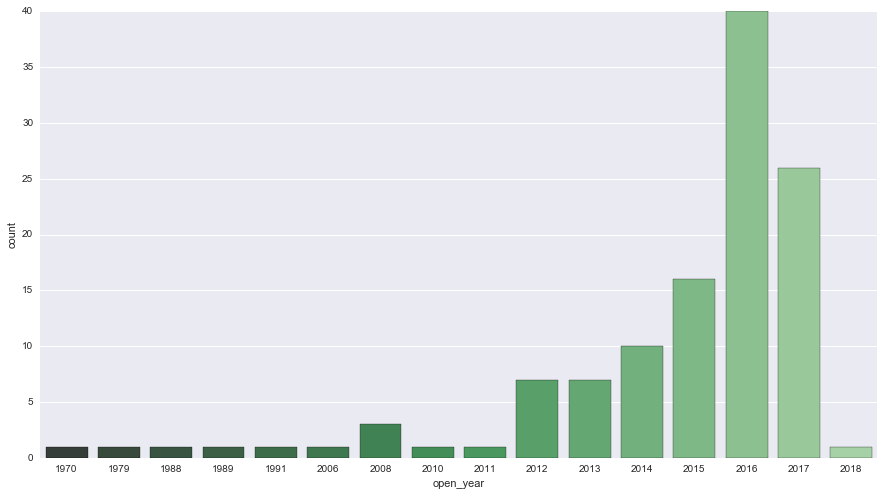

In [191]:
# let's plot a histogran for the open_year column
plt.subplots(figsize=(15,8))
sns.countplot(x="open_year", data=df[df['open_year'] != 'NaT'], palette="Greens_d")

In [60]:
# This is maptime, so let's create a map!
map = folium.Map(location=[39.7, -104.9])
marker_cluster = MarkerCluster().add_to(map)

# add a marker for every record in the filtered data, use a clustered view
for brewery in df.iterrows():
    folium.Marker(
        location = [brewery[1]['lat'],brewery[1]['lng']], popup=brewery[1]['name']).add_to(marker_cluster)

map